In [1]:
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize


In [2]:
# Download NLTK data (if not already downloaded)
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
df = pd.read_csv('text_emotion.csv')
df.head()

,tweet_id,sentiment,author,content
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...


In [4]:
import re

# filter urls, usernames, and stock tickers
combined_pattern = re.compile(r'https?://\S+|\$\w+|\@\w+')

# Non-alphabetical characters pattern remains the same
non_alpha_pattern = re.compile(r'[^a-zA-Z\']')

def get_tokens(tweet):
    # Convert to lower case and remove URLs, tickers, and usernames in one step
    tweet_treat = combined_pattern.sub(' ', tweet.lower())

    # Remove non-alphabetical characters while preserving apostrophes
    tweet_treat = non_alpha_pattern.sub(' ', tweet_treat)

    # Split, filter out single-character words, and join in one line
    return ' '.join(word for word in tweet_treat.split() if len(word) > 1)

In [5]:
df['tokens'] = df['content'].apply(lambda x: get_tokens(x))

In [6]:
df.head()

,tweet_id,sentiment,author,content,tokens
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,know was listenin to bad habit earlier and sta...
1,1956967666,sadness,wannamama,Layin n bed with a headache ughhhh...waitin o...,layin bed with headache ughhhh waitin on your ...
2,1956967696,sadness,coolfunky,Funeral ceremony...gloomy friday...,funeral ceremony gloomy friday
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends SOON!,wants to hang out with friends soon
4,1956968416,neutral,xkilljoyx,@dannycastillo We want to trade with someone w...,we want to trade with someone who has houston ...


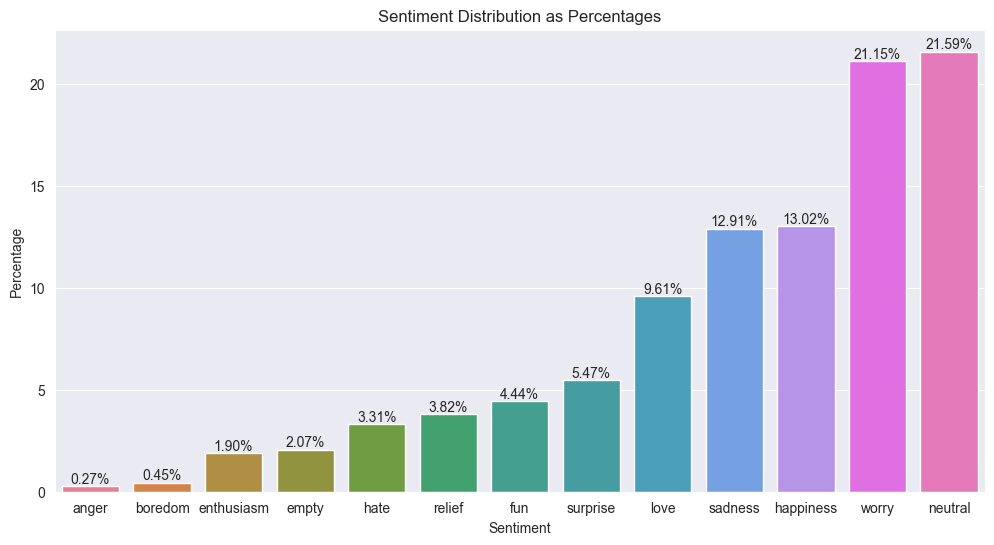

In [7]:
# visualizing classes
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

percentages = df['sentiment'].value_counts(normalize=True).sort_values() * 100
percentages = percentages.reset_index()
percentages.columns = ['sentiment', 'percentage']

palette_colors = sns.color_palette('husl', len(percentages))
sns.barplot(x='sentiment', y='percentage', data=percentages, hue='sentiment')
for index, value in enumerate(percentages['percentage']):
    plt.text(index, value, f'{value:.2f}%', ha='center', va='bottom')

# title and labels
plt.title('Sentiment Distribution as Percentages')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')

# Display the plot
plt.show()

In [18]:
len(df.sentiment.unique())

13

In [20]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Load and preprocess data
df = pd.read_csv('text_emotion.csv')

# Preprocessing functions
STOP_WORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()

def preprocess_tweet(tweet):
    # Regular expressions for filtering and cleaning text
    url_username_pattern = re.compile(r'https?://\S+|\$\w+|\@\w+')
    non_alpha_pattern = re.compile(r'[^a-zA-Z\']')

    # Cleaning process
    cleaned_tweet = url_username_pattern.sub(' ', tweet.lower())
    cleaned_tweet = non_alpha_pattern.sub(' ', cleaned_tweet)
    return cleaned_tweet


def lemmatize_tweet(tweet):
    words = [word for word in word_tokenize(tweet) if word.isalpha() and word not in STOP_WORDS]
    return " ".join([LEMMATIZER.lemmatize(LEMMATIZER.lemmatize(word, 'n'), 'v') for word in words])


# Apply preprocessing to the dataset
df['processed'] = df['content'].apply(preprocess_tweet).apply(lemmatize_tweet)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
df['processed'].head()

0    know listenin bad habit earlier start freakin ...
1              layin n bed headache ughhhh waitin call
2                       funeral ceremony gloomy friday
3                                want hang friend soon
4                want trade someone houston ticket one
Name: processed, dtype: object

<Axes: >

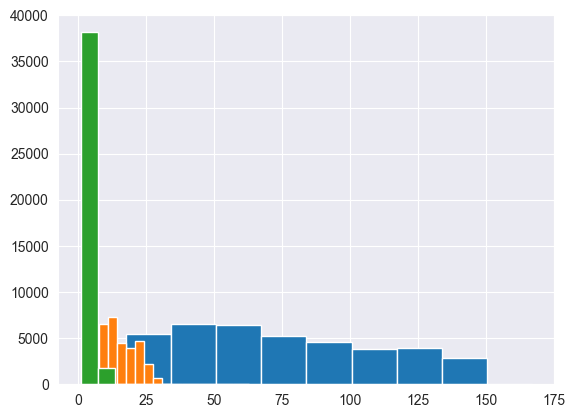

In [23]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as mtplt
from nltk.corpus import stopwords
from collections import  Counter
from sklearn.feature_extraction.text import CountVectorizer
import gensim
from nltk.stem import WordNetLemmatizer,PorterStemmer
from nltk.tokenize import word_tokenize
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from wordcloud import WordCloud, STOPWORDS
pyLDAvis.enable_notebook()


# ### Data Retrieval and processing to extract tokens after lemmatize operation
tweetData = pd.read_csv('text_emotion.csv', index_col=False)



# > We begin the analysis by understanding the rough estimation of the tweet length, by finding out the number of characters present in each sentence of a tweet.
tweetData['content'].str.len().hist()


# > To get a rough estimation of dimensions needed for the neural network architecture - by counting the number of words in each tweet
tweetData['content'].str.split().map(lambda x: len(x)).    hist()

# > Now, we check the average word length in each sentence
tweetData['content'].str.split().apply(lambda x : [len(i) for i in x]).map(lambda x: np.mean(x)).hist()


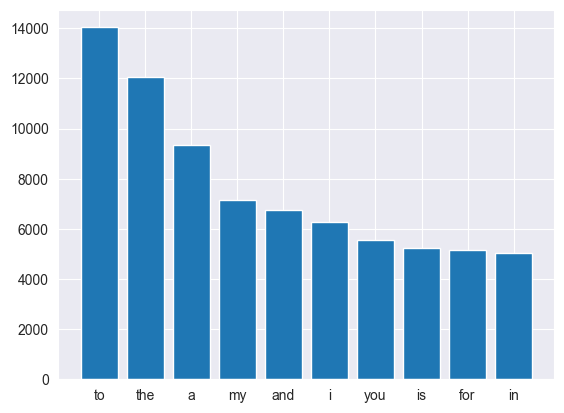

In [24]:

# > From the above analysis, one may assume that people are generally using really short words in tweets, and, although this conjecture may ne true in some cases, it is not a correct conclusion/explaination to explaing the plots obtained. One reason for this is the presence of stopwords, words that are most commonly used in any language (a, an, the, etc.). This can explain why the above plot could be left skewed by short words.


# Plot the occurances of the most common stopwords in the dataset
check= tweetData['content'].str.split()
check=check.values.tolist()
corpus=[word for i in check for word in i]

from collections import defaultdict
dic=defaultdict(int)
for word in corpus:
    if word in STOP_WORDS:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
x,y=zip(*top)
mtplt.bar(x,y)
mtplt.show()


<Axes: >

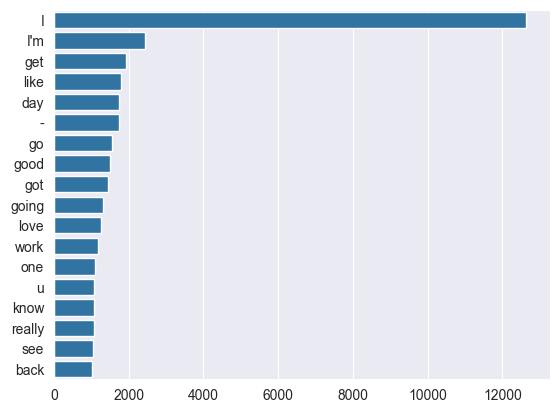

In [25]:
# > Now we know which stopwords occur frequently in the dataset. The next step is to inspect which words other than these stopwords occur just as frequently, if not more, or less. This is achieved using the collections library function. 



counter=Counter(corpus)
most=counter.most_common()

x, y= [], []
for word,count in most[:60]:
    if (word not in STOP_WORDS):
        x.append(word)
        y.append(count)

sb.barplot(x=y,y=x)

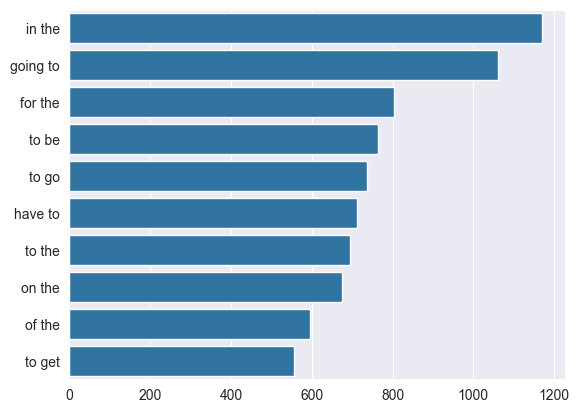

In [26]:
# > Since these are tweets (hence, unfortunatelly, the poor grammar) it will include quite a number stopwords as well. Therefore, next, we will use N-gram analysis - N-grams are simply contiguous sequences of n words. Looking at most frequent n-grams can give a better understanding of the context in which the word was used. To build a representation of the vocabulary Countvectorizer has been used. Countvectorizer is a simple method used to tokenize, vectorize and represent the corpus in an appropriate form. A function that combines everything above hsa be depicted below - 




def plot_top_ngrams_barchart(text, n=2):
    new= text.str.split()
    new= new.values.tolist()
    def _get_top_ngram(corpus, n=None):
        vec = CountVectorizer(ngram_range=(n, n)).fit(corpus)
        bag_of_words = vec.transform(corpus)
        sum_words = bag_of_words.sum(axis=0)
        words_freq = [(word, sum_words[0, idx])
                      for word, idx in vec.vocabulary_.items()]
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
        return words_freq[:10]

    top_n_bigrams=_get_top_ngram(text,n)[:10]
    x,y=map(list,zip(*top_n_bigrams))
    sb.barplot(x=y,y=x)


plot_top_ngrams_barchart(tweetData['content'],2)

In [27]:

plot_top_ngrams_barchart(tweetData['content'],3)

KeyError: 'tweet'

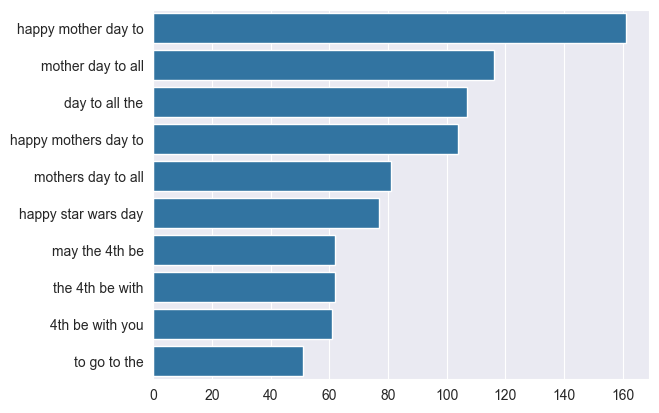

In [28]:

plot_top_ngrams_barchart(tweetData['content'],4)

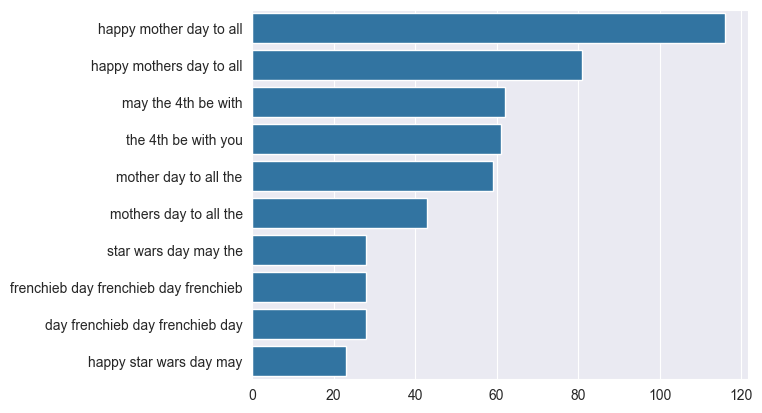

In [29]:
# In[14]:
plot_top_ngrams_barchart(tweetData['content'],5)

In [30]:
# > Topic modeling is the process of using unsupervised learning techniques to extract the main topics that occur in a collection of documents. Latent Dirichlet Allocation (LDA) is an easy to use and efficient model for topic modeling. Each document is represented by the distribution of topics and each topic is represented by the distribution of words. This has been used in practice below to better analyse the dataset.

# The output of the following cells are interactable - to give a better idea of the dataset
def get_lda_objects(text):
    nltk.download('stopwords')
    nltk.download('punkt')
    nltk.download('wordnet')
    stop=set(stopwords.words('english'))


    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    dic=gensim.corpora.Dictionary(corpus)
    bow_corpus = [dic.doc2bow(doc) for doc in corpus]

    lda_model =  gensim.models.LdaMulticore(bow_corpus,
                                            num_topics = 10,
                                            id2word = dic,
                                            passes = 10,
                                            workers = 2)

    return lda_model, bow_corpus, dic

def plot_lda_vis(lda_model, bow_corpus, dic):
    vis = gensimvis.prepare(lda_model, bow_corpus, dic)
    return vis


In [31]:
lda_model, bow_corpus, dic = get_lda_objects(tweetData['content'])

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [32]:
lda_model.show_topics()

[(0,
  '0.058*"day" + 0.036*"mother" + 0.034*"happy" + 0.018*"got" + 0.016*"mom" + 0.012*"home" + 0.010*"back" + 0.008*"Just" + 0.007*"DAY" + 0.007*"HAPPY"'),
 (1,
  '0.028*"work" + 0.022*"..." + 0.016*"day" + 0.011*"today" + 0.009*"weekend" + 0.009*"tomorrow" + 0.008*"amp" + 0.007*"get" + 0.007*"got" + 0.007*"school"'),
 (2,
  '0.018*"twitter" + 0.013*"follow" + 0.011*"Hey" + 0.009*"follower" + 0.009*"fun" + 0.008*"Haha" + 0.008*"cool" + 0.008*"love" + 0.006*"amp" + 0.005*"new"'),
 (3,
  '0.019*"like" + 0.016*"week" + 0.015*"..." + 0.010*"http" + 0.009*"look" + 0.009*"one" + 0.009*"next" + 0.008*"Yeah" + 0.008*"good" + 0.007*"rain"'),
 (4,
  '0.018*"thank" + 0.016*"Thank" + 0.011*"miss" + 0.010*"much" + 0.008*"\'re" + 0.008*"hear" + 0.008*"aww" + 0.007*"okay" + 0.007*"God" + 0.007*"making"'),
 (5,
  '0.047*"n\'t" + 0.020*"get" + 0.017*"..." + 0.014*"\'ll" + 0.014*"going" + 0.013*"see" + 0.012*"know" + 0.010*"think" + 0.009*"need" + 0.009*"one"'),
 (6,
  '0.071*"quot" + 0.014*"..." + 0

In [33]:
# Can adjust the metric value, as well as the topics
plot_lda_vis(lda_model, bow_corpus, dic)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.166294  0.098755       1        1  24.391196
1     -0.137615 -0.030554       2        1  12.042286
9     -0.126477  0.042100       3        1  11.958882
7     -0.058382 -0.059848       4        1  10.004804
6      0.021893  0.103160       5        1   8.904724
0     -0.029456 -0.243846       6        1   8.063247
3      0.022571  0.059053       7        1   7.665306
2      0.131938  0.059699       8        1   6.027086
8      0.174917  0.019682       9        1   5.732036
4      0.166905 -0.048202      10        1   5.210433, topic_info=        Term         Freq        Total Category  logprob  loglift
145     quot  1987.000000  1987.000000  Default  30.0000  30.0000
33       n't  3946.000000  3946.000000  Default  29.0000  29.0000
218      day  2992.000000  2992.000000  Default  28.0000  28.0000
3373  mother   924.000000   924.000000  Default  27.0000  27.0000
4925   Happy   954.000000   954.000000  Default  26.0000  26.0000
...      ...          ...          ...      ...      ...      ...
477      guy    68.691605   467.673802  Topic10  -5.4724   1.0364
54      cant    56.642334   303.680164  Topic10  -5.6653   1.2753
44      http    75.185784  1906.461082  Topic10  -5.3821  -0.2785
382   really    68.082535  1093.793654  Topic10  -5.4813   0.1778
459     back    62.836185  1132.144395  Topic10  -5.5615   0.0632

[667 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
2549      10  0.974283    'em
321        1  0.961892    'll
321        2  0.002692    'll
321        4  0.015254    'll
321        7  0.015254    'll
...      ...       ...    ...
800        3  0.112368    yet
800        8  0.013220    yet
15792      1  0.982338    yum
6288       8  0.982741  yummy
2720       6  0.963199    ï¿½

[1551 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 2, 10, 8, 7, 1, 4, 3, 9, 5])

In [36]:
# > Wordcloud is a great way to represent text data. The size and color of each word that appears in the wordcloud indicate it’s frequency or importance.

def plot_wordcloud(text):
    nltk.download('stopwords')
    stop=set(stopwords.words('english'))

    def _preprocess_text(text):
        corpus=[]
        stem=PorterStemmer()
        lem=WordNetLemmatizer()
        for news in text:
            words=[w for w in word_tokenize(news) if (w not in stop)]

            words=[lem.lemmatize(w) for w in words if len(w)>2]

            corpus.append(words)
        return corpus

    corpus=_preprocess_text(text)

    wordcloud = WordCloud(
        background_color='white',
        stopwords=set(STOPWORDS),
        max_words=100,
        max_font_size=30,
        scale=3,
        random_state=1)

    wordcloud=wordcloud.generate(str(corpus))

    fig = mtplt.figure(1, figsize=(12, 12))
    mtplt.axis('off')

    mtplt.imshow(wordcloud)
    mtplt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\fight\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\fight\venvs\sc4001\Lib\site-packages\wordcloud\wordcloud.py:106: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  self.colormap = plt.cm.get_cmap(colormap)


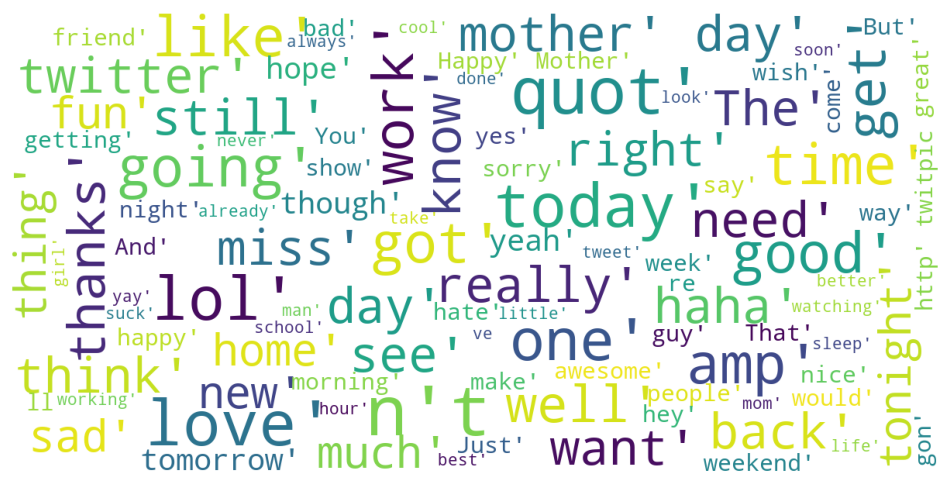

In [37]:
plot_wordcloud(tweetData['content'])

In [ ]:
# binning the data into broad based buckets:
# # neutral - neutral
# # positive - happiness, love, surprise, fun, relief, enthusiasm
# # positive - happiness, love, surprise, fun, relief, enthusiasm

In [ ]:
import torch
from torch import nn
from torch.nn import functional as F
from pytorch_lightning import LightningModule

class Attention(nn.Module):
    def __init__(self, embedding_dim):
        super(Attention, self).__init__()
        self.embedding_dim = embedding_dim
        self.W_a = nn.Parameter(torch.randn(embedding_dim, embedding_dim))
        self.W_c = nn.Parameter(torch.randn(2*embedding_dim, embedding_dim))

    def forward(self, hidden_vectors, context_vectors):
        # hidden_vectors shape: (batch_size, seq_len, embedding_dim)
        # context_vectors shape: (batch_size, context_size, embedding_dim)

        batch_size, seq_len, _ = hidden_vectors.size()

        # Reshape hidden vectors to (batch_size * seq_len, embedding_dim)
        reshape_hidden_vectors = hidden_vectors.reshape(batch_size * seq_len, self.embedding_dim)

        # Applying W_a to hidden vectors (None*30, 100)
        temp = torch.matmul(reshape_hidden_vectors, self.W_a)

        # Reshape temp back to (batch_size, seq_len, embedding_dim)
        temp = temp.reshape(batch_size, seq_len, self.embedding_dim)

        # Transpose context vectors to (batch_size, embedding_dim, context_size)
        context_vectors_transpose = context_vectors.transpose(1, 2)

        # Compute attention weights (batch_size, seq_len, context_size)
        attention_weights = torch.matmul(temp, context_vectors_transpose)

        # Apply softmax to get attention probabilities
        attention_probability = F.softmax(attention_weights, dim=-1)

        # Compute context vectors (batch_size, seq_len, embedding_dim)
        c_attention_vectors = torch.matmul(attention_probability, context_vectors)

        # Concatenate the context vectors and hidden vectors
        concatenated_vectors = torch.cat((c_attention_vectors, hidden_vectors), dim=2)

        # Reshape concatenated vectors to (batch_size * seq_len, 2*embedding_dim)
        reshape_concatenated_vectors = concatenated_vectors.reshape(batch_size * seq_len, 2*self.embedding_dim)

        # Apply W_c to get final vectors
        final_vectors = torch.tanh(torch.matmul(reshape_concatenated_vectors, self.W_c))

        # Reshape final vectors back to (batch_size, seq_len, embedding_dim)
        reshaped_final_vectors = final_vectors.reshape(batch_size, seq_len, self.embedding_dim)

        return reshaped_final_vectors

class TextSentimentModel(LightningModule):
    def __init__(self, vocab_size, embedding_dim, lstm_hidden, output_size):
        super(TextSentimentModel, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, lstm_hidden, bidirectional=True, batch_first=True)
        self.lstm2 = nn.LSTM(lstm_hidden*2, lstm_hidden, bidirectional=True, batch_first=True) # times 2 because it's bidirectional
        self.attention = Attention(lstm_hidden*2) # assuming the attention mechanism returns a vector of the same size
        self.dense = nn.Linear(lstm_hidden*2, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)
        lstm_out2, _ = self.lstm2(lstm_out)
        attention_out = self.attention(lstm_out2)
        out = self.dense(attention_out[:, -1, :]) # Getting the output of the last LSTM unit
        return F.log_softmax(out, dim=1)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = F.nll_loss(y_hat, y)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.002)

# You will need to define the vocab_size and output_size based on your dataset
vocab_size = 10000  # Example vocab size, you should set this to your vocabulary size
output_size = 9  # Output classes

model = TextSentimentModel(vocab_size=vocab_size, embedding_dim=8, lstm_hidden=256, output_size=output_size)

# Continue with PyTorch Lightning training setup...


In [ ]:
import torch
from torch import nn
from torch.nn import functional as F

class BahdanauAttention(nn.Module):
    def __init__(self, query_dim, key_dim, attention_dim):
        super(BahdanauAttention, self).__init__()
        self.query_layer = nn.Linear(query_dim, attention_dim)
        self.key_layer = nn.Linear(key_dim, attention_dim)
        self.energy_layer = nn.Linear(attention_dim, 1)
        self.softmax = nn.Softmax(dim=1)

    def forward(self, query, keys):
        # query => [batch_size, query_dim]
        # keys => [batch_size, seq_len, key_dim]

        query = query.unsqueeze(1)  # [batch_size, 1, query_dim]
        projected_query = self.query_layer(query)  # [batch_size, 1, attention_dim]
        projected_keys = self.key_layer(keys)  # [batch_size, seq_len, attention_dim]

        # Calculate energies
        energy = torch.tanh(projected_query + projected_keys)  # [batch_size, seq_len, attention_dim]
        energy = self.energy_layer(energy)  # [batch_size, seq_len, 1]
        energy = energy.squeeze(-1)  # [batch_size, seq_len]

        # Compute attention weights
        attention_weights = self.softmax(energy)  # [batch_size, seq_len]

        # Apply attention weights
        attended = torch.bmm(attention_weights.unsqueeze(1), keys)  # [batch_size, 1, key_dim]
        attended = attended.squeeze(1)  # [batch_size, key_dim]

        return attended, attention_weights

class TextSentimentModel(nn.Module):
    def __init__(self, vocab_size, embedding_dim, lstm_hidden, output_size):
        super(TextSentimentModel).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, lstm_hidden, bidirectional=True, batch_first=True)
        self.lstm2 = nn.LSTM(lstm_hidden*2, lstm_hidden, bidirectional=True, batch_first=True)
        self.attention = BahdanauAttention(lstm_hidden*2, lstm_hidden*2, lstm_hidden)
        self.dense = nn.Linear(lstm_hidden*2, output_size)

    def forward(self, x):
        embedded = self.embedding(x)
        lstm_out, _ = self.lstm(embedded)  # [batch_size, seq_len, lstm_hidden*2]
        lstm_out2, (hidden, _) = self.lstm2(lstm_out)  # [batch_size, seq_len, lstm_hidden*2]

        # We will apply attention using the last hidden state from the second LSTM
        hidden = hidden.view(hidden.shape[1], -1)  # [batch_size, lstm_hidden*2]

        # Attention
        attended, attention_weights = self.attention(hidden, lstm_out2)

        # Classifier
        out = self.dense(attended)
        return F.log_softmax(out, dim=1)


In [14]:
# Tokenize the "content" column

# checker.correct_strings(
#     ["I luk foward to receving your reply", "were did wendigo goe boating?"])




# Display the DataFrame with tokens
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,tweet_id,sentiment,author,content,tokens
0,1956967341,empty,xoshayzers,@tiffanylue i know i was listenin to bad habi...,"[@, tiffanylue, i, know, i, was, listenin, to,..."
1,1956967666,sadness,wannamama,layin n bed with a headache ughhhh...waitin o...,"[layin, n, bed, with, a, headache, ughhhh, ......"
2,1956967696,sadness,coolfunky,funeral ceremony...gloomy friday...,"[funeral, ceremony, ..., gloomy, friday, ...]"
3,1956967789,enthusiasm,czareaquino,wants to hang out with friends soon!,"[wants, to, hang, out, with, friends, soon, !]"
4,1956968416,neutral,xkilljoyx,@dannycastillo we want to trade with someone w...,"[@, dannycastillo, we, want, to, trade, with, ..."
...,...,...,...,...,...
39995,1753918954,neutral,showMe_Heaven,@johnlloydtaylor,"[@, johnlloydtaylor]"
39996,1753919001,love,drapeaux,happy mothers day all my love,"[happy, mothers, day, all, my, love]"
39997,1753919005,love,JenniRox,happy mother's day to all the mommies out ther...,"[happy, mother, ', s, day, to, all, the, mommi..."
39998,1753919043,happiness,ipdaman1,@niariley wassup beautiful!!! follow me!! pee...,"[@, niariley, wassup, beautiful, !!!, follow, ..."


In [ ]:
from transformers import BertTokenizer, BertModel
import torch
import numpy as np
import json

# Load the pre-trained BERT model and tokenizer
model_name = "bert-base-uncased"
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertModel.from_pretrained(model_name)


# Initialize an empty list to store embeddings

trainData = []

# Tokenize and convert each word to embeddings
for words in df['tokens']:
  embeddings = []
  for word in words:
      # Tokenize the word
      tokens = tokenizer.tokenize(word)
      # Convert tokens to IDs
      input_ids = tokenizer.convert_tokens_to_ids(tokens)
      # Create a tensor from input IDs
      input_ids = torch.tensor(input_ids).unsqueeze(0)  # Add batch dimension

      # Get embeddings
      with torch.no_grad():
          outputs = model(input_ids)

      # Sum the subword embeddings
      word_embedding = torch.sum(outputs.last_hidden_state, dim=1).numpy()

      embeddings.append(word_embedding.tolist()[0])
  trainData.append(embeddings)

# Now 'embeddings' contains the embeddings for each word
# for word, embedding in zip(words, embeddings):
#     print(f"Word: {word}, Embedding Shape: {embedding.shape}")

# Find the maximum length of embeddings in trainData
max_length = max(len(embedding) for embedding in trainData)

padVec = [ 0 for i in range(768)]

for i in range(len(trainData)):
  while len(trainData[i]) < max_length:
    trainData[i].append(padVec)

trainData = [data for data in trainData]

file_name = "data.json"

# Open the file in write mode and store the data
with open(file_name, "w") as json_file:
    json.dump(trainData, json_file)

print(f"Data has been saved to {file_name}")


In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


# Extract the 'sentiment' column as the target variable
sentiments = df['sentiment'].values

sentiments = [[label] for label in sentiments]

# Initialize the OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Fit and transform the encoder on the target variable
y = encoder.fit_transform(sentiments)

# y_train is now an array of one-hot encoded vectors
y

In [22]:
import torch.nn.functional as F
import torch.optim as optim
import torch
import torch.nn as nn
import lightning as L

class DualCnnBiLsmtModel(L.LightningModule):
    def __init__(self, embedding_dim, hidden_dim, tagset_size,senLen,lr):
        super(DualCnnBiLsmtModel, self).__init__()
        torch.manual_seed(seed=42)
        self.hidden_dim = hidden_dim
        self.tagset_size = tagset_size
        self.cnn = nn.Conv2d(in_channels=32, out_channels=32, kernel_size=(senLen, 1))
        self.fc1 = nn.Linear(1, hidden_dim)  # Adjust the hidden_dim as needed
        self.fc2 = nn.Linear(hidden_dim, self.tagset_size)
        self.lstm = nn.LSTM(embedding_dim, 128//2, num_layers=1, bidirectional=True)
        self.hidden2tag = nn.Linear(hidden_dim, tagset_size)
        self.dropout = nn.Dropout(p=0.35)
        self.relu = nn.ReLU()
        self.learning_rate =lr

    def forward(self, x):
        lstm_output1, _ = self.lstm(x)

        cnn_output1 = F.relu(self.cnn(lstm_output1))

        cnn_output1 = self.dropout(cnn_output1)
        # output1 = F.max_pool1d(lstm_output1, lstm_output1.size(2)).squeeze(2)

        cnn_output2 = F.relu(self.cnn(x))
        # cnn_output1 = F.max_pool1d(cnn_output1, cnn_output1.size(2)).squeeze(2)
        cnn_output2 = self.dropout(cnn_output2)
        lstm_output2, _ = self.lstm(cnn_output2)

        combined_output = torch.cat((lstm_output2, cnn_output1),dim=2)

        output = F.max_pool1d(combined_output, combined_output.size(2))

        output = output.view(combined_output.size(0), -1)

        # Apply the first dense (fully connected) layer
        output = self.fc1(output)
        # Apply the second dense layer
        output = self.fc2(output)

        output = F.softmax(output)



        # print(output.size())

        # output2 = self.relu(lstm_output)  # Apply ReLU activation
        # output2 = self.hidden2tag(lstm_output)
        return output

    def loss(self, x, y):
      logits = self.forward(x)

      criterion = nn.CrossEntropyLoss()  # Use CrossEntropyLoss for softmax loss
      loss = criterion(logits, y)

      return loss

    # def decode(self, x):
    #     logits = self.forward(x)
    #     predicted_tags = self.crf.decode(logits)
    #     return predicted_tags

    def training_step(self, batch, batch_idx):
        x, y = batch
        loss = self.loss(x, y)
        print(loss)
        return loss
    #0.0031622776601683794
    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr= self.learning_rate)
        return optimizer


In [3]:
import json
    for line in f:
        data = json.loads(line[0])
        print(data)
        break


KeyboardInterrupt



In [8]:
import gc
gc.collect()

0

In [ ]:
del trainData_padded

In [ ]:
import torch
import torch.nn as nn
import pytorch_lightning as pl
from torchmetrics.functional import accuracy

class BLSTM2DPooling(pl.LightningModule):
    def __init__(self, input_dim, hidden_dim, output_dim, dropout_rate=0.5, learning_rate=1e-3):
        super().__init__()
        self.save_hyperparameters()

        # Bidirectional LSTM Layer
        self.lstm = nn.LSTM(input_dim, hidden_dim, batch_first=True, bidirectional=True)
        
        # 2D Max Pooling Layer
        self.pooling = nn.MaxPool2d(kernel_size=(1, hidden_dim * 2))

        # Dropout for regularization
        self.dropout = nn.Dropout(dropout_rate)
        
        # Fully connected output layer
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        lstm_out = lstm_out.unsqueeze(1)
        pooled = self.pooling(lstm_out)
        flattened = self.dropout(pooled.view(pooled.size(0), -1))
        output = self.fc(flattened)
        return output

    def training_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = nn.functional.cross_entropy(logits, y)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('train_loss', loss, on_step=True, on_epoch=True, prog_bar=True)
        self.log('train_acc', acc, on_step=True, on_epoch=True, prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        logits = self.forward(x)
        loss = nn.functional.cross_entropy(logits, y)
        preds = torch.argmax(logits, dim=1)
        acc = accuracy(preds, y)
        self.log('val_loss', loss, prog_bar=True)
        self.log('val_acc', acc, prog_bar=True)

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=self.hparams.learning_rate)
        lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=1, gamma=0.95)
        return [optimizer], [lr_scheduler]

    def train_dataloader(self):
        # Implement the logic to return training DataLoader
        pass

    def val_dataloader(self):
        # Implement the logic to return validation DataLoader
        pass

    def test_dataloader(self):
        # Implement the logic to return test DataLoader
        pass


In [ ]:
from pytorch_lightning import Trainer
from pytorch_lightning.callbacks import EarlyStopping, ModelCheckpoint

early_stop_callback = EarlyStopping(
   monitor='val_loss',
   min_delta=0.00,
   patience=3,
   verbose=False,
   mode='min'
)

checkpoint_callback = ModelCheckpoint(
    monitor='val_loss',
    filename='model-{epoch:02d}-{val_loss:.2f}',
    save_top_k=3,
    mode='min',
)

trainer = Trainer(
    callbacks=[early_stop_callback, checkpoint_callback],
    max_epochs=10,
    gpus=1 if torch.cuda.is_available() else 0,
)

model = BLSTM2DPooling(input_dim, hidden_dim, output_dim)
trainer.fit(model)


In [24]:
m1 = DualCnnBiLsmtModel(768, 128, 10, 32, 1e-3)

In [26]:
from lightning.pytorch.callbacks import ModelSummary
ModelSummary(m1)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from pytorch_lightning.callbacks import LearningRateFinder
import lightning as L

# Define the dimensions and size of your dataset
embedding_dim = 768  # Change this to match your word embedding dimension
hidden_dim = 128  # Change this to match your model architecture
tagset_size = len(y[0].tolist())  # The number of classes: happy, sad, anger
batch_size = 32

trainData= torch.tensor(trainData)
y = torch.tensor(y.tolist()).to(float)
batch_size = 32
dataset = TensorDataset(trainData, y)

model = DualCnnBiLsmtModel(embedding_dim, hidden_dim, tagset_size, len(trainData[0]),0.1)

dataloader = DataLoader(dataset, batch_size=batch_size, drop_last=True)

trainer = L.Trainer(max_epochs=1000)
tuner = L.pytorch.tuner.Tuner(trainer)
# Run the learning rate finder
lr_finder = tuner.lr_find(model, train_dataloaders= dataloader, min_lr=0.000000001, max_lr=1,early_stop_threshold=None)

# Plot the learning rate finder results
fig = lr_finder.plot(suggest=True)
suggested_lr = lr_finder.suggestion()
print("Suggested Learning Rate:", suggested_lr)

In [ ]:
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from torch.utils.data.dataset import random_split

# Define the dimensions and size of your dataset
embedding_dim = 768  # Change this to match your word embedding dimension
hidden_dim = 128  # Change this to match your model architecture
tagset_size = len(y[0].tolist())  # The number of classes: happy, sad, anger
batch_size = 32

trainData= torch.tensor(trainData)
y = torch.tensor(y.tolist()).to(float)

# Create a PyTorch dataset
dataset = TensorDataset(trainData, y)

# Define the number of folds for cross-validation
num_folds = 10

# Initialize a PyTorch Lightning trainer with your desired settings
trainer = L.Trainer(max_epochs=2000)  # Adjust max_epochs as needed

# Initialize KFold cross-validation
kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# model = BiLSTMCRFModel(embedding_dim, hidden_dim, tagset_size, len(trainData[0]))

# Lists to store performance metrics for each fold
fold_metrics = []
accuracy = 0
# Perform 10-fold cross-validation
for fold, (train_indices, test_indices) in enumerate(kf.split(dataset)):
    # Create data loaders for the current fold


    train_sampler = torch.utils.data.SubsetRandomSampler(train_indices)
    test_sampler = torch.utils.data.SubsetRandomSampler(test_indices)


    train_loader = DataLoader(dataset, batch_size=batch_size, sampler=train_sampler, drop_last=True)
    test_loader = DataLoader(dataset, batch_size=batch_size, sampler=test_sampler, drop_last=True)

    # Create a new model for each fold
    model = DualCnnBiLsmtModel(embedding_dim, hidden_dim, tagset_size, len(trainData[0]),suggested_lr)

    # Train the model
    trainer.fit(model, train_loader, test_loader)

    correct_predictions = 0
    total_predictions = 0


    for batch in test_loader:  # Assuming you have a DataLoader for the test set
      x_test, y_test = batch

      # Forward pass to get model predictions
      with torch.no_grad():  # Disable gradient tracking
          predictions = model(x_test)



      # Convert predictions to class labels by selecting the class with the highest probability
      predicted_labels = torch.argmax(predictions, dim=1)
      true_labels = torch.argmax(y_test, dim=1)

      # Compare predicted labels with true labels
      correct_predictions += (predicted_labels == true_labels).sum().item()
      total_predictions += len(y_test)

    # accuracy = correct_predictions / total_predictions
    print(correct_predictions)
    print(total_predictions)
    accuracy += correct_predictions/total_predictions

print("Model 10-Fold accuracy = ",accuracy/10)

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import torch.nn.functional as F
import torch.optim as optim
import torch
import torch.nn as nn
import lightning as L
import torch
from torch.utils.data import DataLoader, TensorDataset
from pytorch_lightning.callbacks import LearningRateFinder
import lightning as L
import torch
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import KFold
from torch.utils.data.dataset import random_split